<a href="https://colab.research.google.com/github/RiyaShah0/Parkinson-Disease-Prediction/blob/main/Parkinson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.1/547.1 kB 9.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.optimizers import Adam


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [4]:
# Load the Parkinson's disease dataset
df = pd.read_csv("/content/parkinsons.csv")
df



,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [23]:
# check the column names
print(df.columns)

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [24]:
# separate the features and target
X = df.drop(['status','name'], axis=1)
y = df['status']

In [25]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [26]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [27]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_test

array([[-0.70868013, -0.9007443 , -0.55532143, ...,  0.33081213,
        -0.11385722, -0.3179683 ],
       [-0.3193478 ,  0.00854153, -0.80093728, ...,  0.02395994,
        -0.25154502, -0.28079979],
       [-0.64006044, -0.89772219, -0.65251534, ..., -0.12356069,
        -0.09575651, -0.33012584],
       ...,
       [ 0.4722097 , -0.44789831, -0.4944788 , ..., -0.77626423,
        -0.07689953, -0.76398635],
       [-0.5367958 , -0.86961662, -0.45539857, ...,  0.26568999,
        -0.10264571, -0.74544144],
       [ 0.80191565, -0.41862065, -0.57786682, ..., -0.28865411,
        -0.27761772, -0.68886229]])

In [29]:
# logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [30]:
# KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

In [31]:
# SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

In [32]:
# XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)


In [33]:
import pandas as pd
import numpy as np
import tensorflow as tf
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
import warnings

# Load the Parkinson's disease dataset
df = pd.read_csv("/content/parkinsons.csv")

# separate the features and target
X = df.drop(['status', 'name'], axis=1)
y = df['status']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#------------------------------------
import pandas as pd

# Define the feature names
feature_names = list(X.columns)

# convert numpy array to pandas dataframe
X_train_df = pd.DataFrame(X_train, columns=feature_names)
#------------------------------------------------

# Reshape the data for LSTM (RNN) input: [samples, time steps, features]
n_timesteps = 1  # Since you want to treat each row as a separate sample
n_features = X_train.shape[1]
X_train = X_train.reshape((X_train.shape[0], n_timesteps, n_features))
X_test = X_test.reshape((X_test.shape[0], n_timesteps, n_features))

# Reshape the target variable for compatibility with the model
y_train = y_train.values.reshape(-1, 1)

# Define the RNN + LSTM model
rnn_model = Sequential()
rnn_model.add(LSTM(64, activation='relu', input_shape=(n_timesteps, n_features)))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
rnn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 50
rnn_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

# Evaluate the model
rnn_ypred_prob = rnn_model.predict(X_test).flatten()
rnn_ypred = np.round(rnn_ypred_prob)
accuracy = accuracy_score(y_test, rnn_ypred)
precision = precision_score(y_test, rnn_ypred)
recall = recall_score(y_test, rnn_ypred)
f1 = f1_score(y_test, rnn_ypred)

print('Test Accuracy:', accuracy)
print('Test Precision:', precision)
print('Test Recall:', recall)
print('Test F1 Score:', f1)


Epoch 1/50
5/5 [==============================] - 1s 5ms/step - loss: 0.6977 - accuracy: 0.3971
Epoch 2/50
5/5 [==============================] - 0s 4ms/step - loss: 0.6739 - accuracy: 0.8015
Epoch 3/50
5/5 [==============================] - 0s 5ms/step - loss: 0.6551 - accuracy: 0.7868
Epoch 4/50
5/5 [==============================] - 0s 4ms/step - loss: 0.6364 - accuracy: 0.7574
Epoch 5/50
5/5 [==============================] - 0s 4ms/step - loss: 0.6198 - accuracy: 0.7574
Epoch 6/50
5/5 [==============================] - 0s 4ms/step - loss: 0.6044 - accuracy: 0.7574
Epoch 7/50
5/5 [==============================] - 0s 4ms/step - loss: 0.5877 - accuracy: 0.7574
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 0.5705 - accuracy: 0.7574
Epoch 9/50
5/5 [==============================] - 0s 4ms/step - loss: 0.5562 - accuracy: 0.7574
Epoch 10/50
5/5 [==============================] - 0s 4ms/step - loss: 0.5416 - accuracy: 0.7574
Epoch 11/50
5/5 [======================

In [34]:
# calculate accuracy, precision, recall, and f1 score for all models
models = ['Logistic Regression', 'KNN', 'SVM', 'XGBoost']
accuracies = [accuracy_score(y_test, lr_preds), accuracy_score(y_test, knn_preds),
              accuracy_score(y_test, svm_preds),
              accuracy_score(y_test, xgb_preds)]
precisions = [precision_score(y_test, lr_preds), precision_score(y_test, knn_preds),
              precision_score(y_test, svm_preds),
              precision_score(y_test, xgb_preds)]
recalls = [recall_score(y_test, lr_preds), recall_score(y_test, knn_preds),
           recall_score(y_test, svm_preds),
           recall_score(y_test, xgb_preds)]
f1_scores = [f1_score(y_test, lr_preds), f1_score(y_test, knn_preds),
             f1_score(y_test, svm_preds),
             f1_score(y_test, xgb_preds)]

results = pd.DataFrame({'Model': models, 'Accuracy': accuracies, 'Precision': precisions,
                        'Recall': recalls, 'F1 Score': f1_scores})
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.881356,0.877551,0.977273,0.924731
1,KNN,0.898305,0.895833,0.977273,0.934783
2,SVM,0.881356,0.862745,1.000000,0.926316
3,XGBoost,0.915254,0.897959,1.000000,0.946237


In [36]:
# get the confusion matrix for the best model
print('Confusion Matrix:')
cm  = confusion_matrix(y_test, xgb_preds)
print(cm)


Confusion Matrix:
[[10  5]
 [ 0 44]]


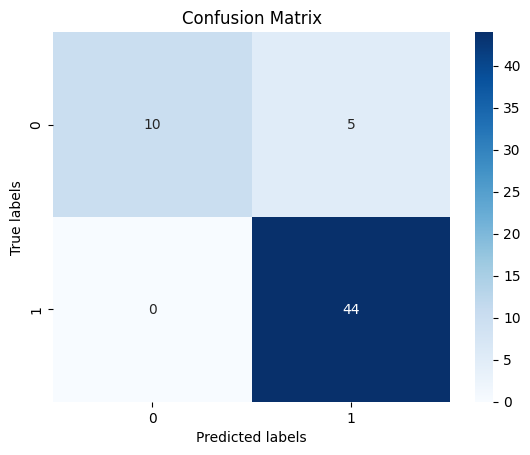

In [37]:
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
# Add labels to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [38]:
# get the classification report for the best model
print('Classification Report:')
print(classification_report(y_test, xgb_preds))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.90      1.00      0.95        44

    accuracy                           0.92        59
   macro avg       0.95      0.83      0.87        59
weighted avg       0.92      0.92      0.91        59



In [41]:
import pandas as pd

# Define the feature names
feature_names = list(X.columns)

# convert numpy array to pandas dataframe
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Use SHAP to explain the best model's predictions
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_train)

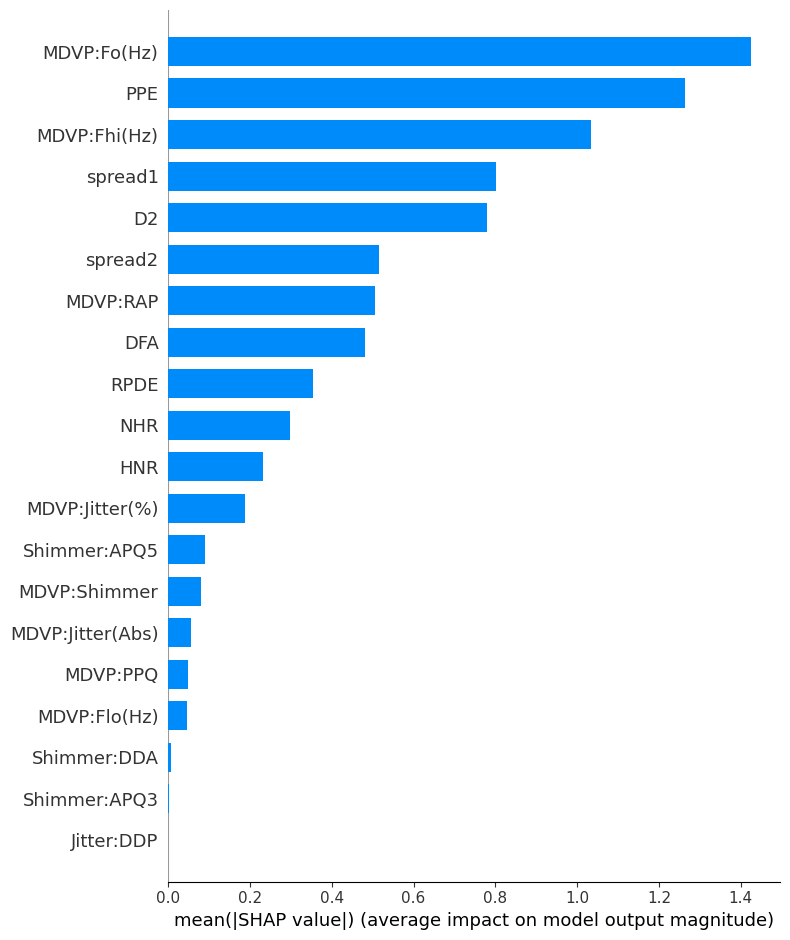

In [42]:
# Plot the feature importance using SHAP
shap.summary_plot(shap_values, X_train_df, plot_type="bar", feature_names=X_train_df.columns)

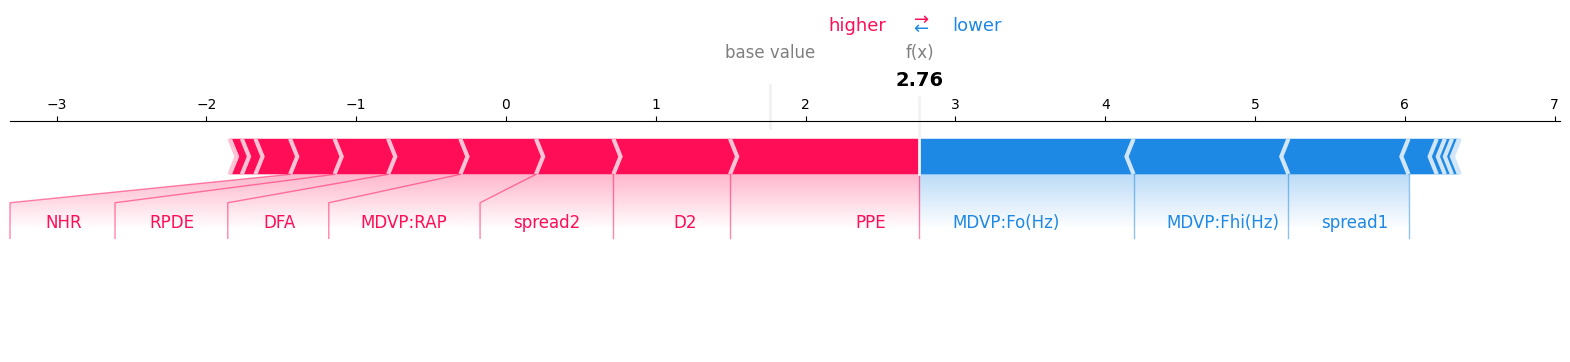

In [44]:
# Select a random instance from the dataset
instance = X.sample(n=1, random_state=42)

# Use SHAP to explain the instance's predictions
explainer = shap.Explainer(xgb_model)
shap_values = explainer(instance)

# Plot the SHAP force plot for the instance
shap.force_plot(
    explainer.expected_value,
    shap_values.values[0],
    feature_names=X.columns,
    matplotlib=True
)

Accuracy: 0.9487179487179487


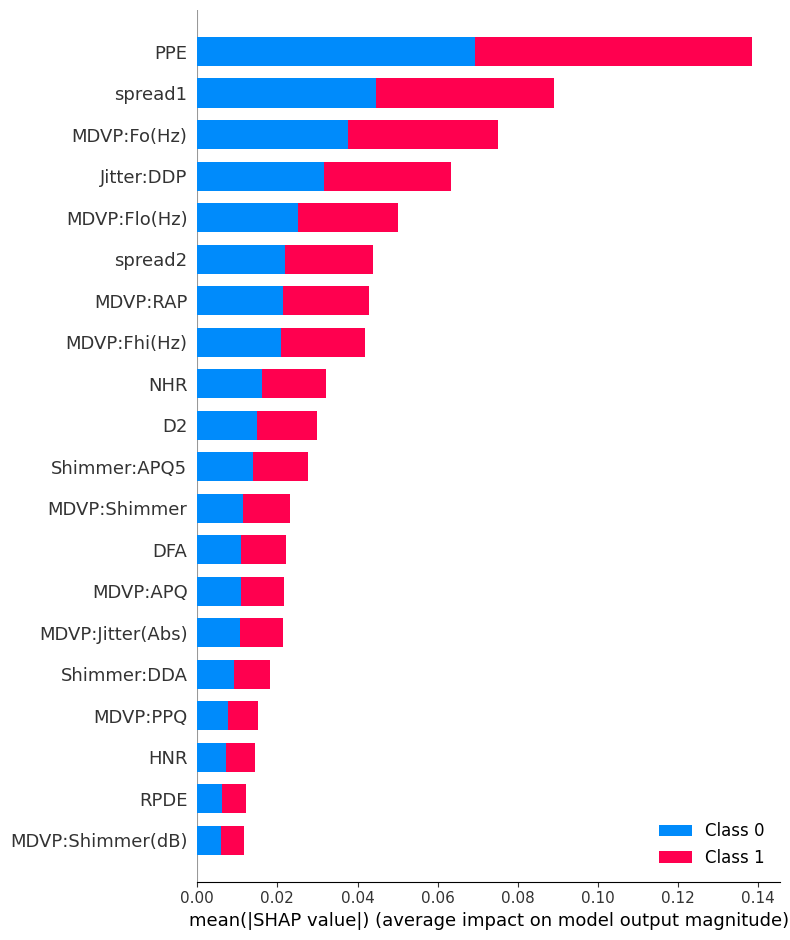

In [40]:
import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the Parkinson's disease dataset
data = pd.read_csv('/content/parkinsons.csv')
X = data.drop(['status', 'name'], axis=1)
y = data['status']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


# Display the accuracy of the model
accuracy = rf_model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Use SHAP to explain the model's predictions
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type='bar')

